In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle
from imblearn.over_sampling import SMOTE

Đọc dữ liệu và show thông tin

In [2]:
df = pd.read_csv('customer-train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MAKHACHHANG                3217 non-null   int64 
 1   PHUONGXA                   3217 non-null   object
 2   QUANHUYEN                  3217 non-null   object
 3   LOAIDICHVU                 3217 non-null   object
 4   LOAIKHACHHANG              3217 non-null   int64 
 5   SODICHVU                   3217 non-null   int64 
 6   SOLANBAOHONG               3217 non-null   int64 
 7   SOLANGOIKIEMBAOHONG        3217 non-null   int64 
 8   SOLANBAOHONGHAILONG        3217 non-null   int64 
 9   SOLANBAOHONGKHONGHAILONG   3217 non-null   int64 
 10  KHAOSATLAPMOI              3217 non-null   int64 
 11  KHAOSATLAPMOIHAILONG       3217 non-null   int64 
 12  KHAOSATLAPMOIKHONGHAILONG  3217 non-null   int64 
 13  SOLANCHAMSOC               3217 non-null   int64 
 14  SOLANTAM

Show tỉ lệ nhãn

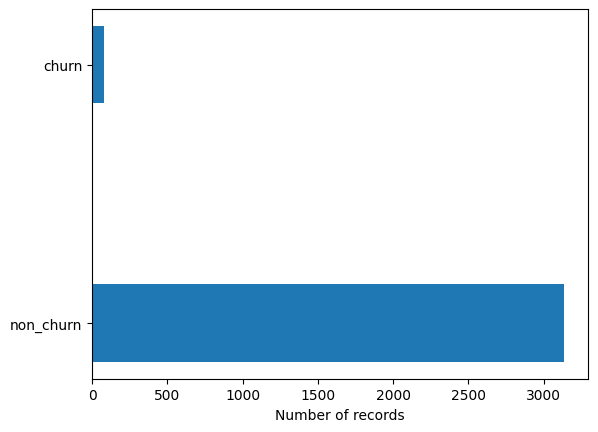

In [8]:
label_value, count = np.unique(df['THANHLY'], return_counts=True)
plt.barh(['non_churn', 'churn'], count, height=0.3)
plt.xlabel("Number of records")
plt.show()

Xóa đi các dòng chứa dữ liệu không hợp lệ

In [17]:
df = df[df['GIADICHVU'] > 0]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3214 entries, 0 to 3216
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MAKHACHHANG                3214 non-null   int64 
 1   PHUONGXA                   3214 non-null   object
 2   QUANHUYEN                  3214 non-null   object
 3   LOAIDICHVU                 3214 non-null   object
 4   LOAIKHACHHANG              3214 non-null   int64 
 5   SODICHVU                   3214 non-null   int64 
 6   SOLANBAOHONG               3214 non-null   int64 
 7   SOLANGOIKIEMBAOHONG        3214 non-null   int64 
 8   SOLANBAOHONGHAILONG        3214 non-null   int64 
 9   SOLANBAOHONGKHONGHAILONG   3214 non-null   int64 
 10  KHAOSATLAPMOI              3214 non-null   int64 
 11  KHAOSATLAPMOIHAILONG       3214 non-null   int64 
 12  KHAOSATLAPMOIKHONGHAILONG  3214 non-null   int64 
 13  SOLANCHAMSOC               3214 non-null   int64 
 14  SOLANTAMNGUNG

Bỏ đi những cột không quan trọng

In [3]:
df.drop(["MAKHACHHANG", "PHUONGXA", "QUANHUYEN", "HINHTHUCTHANHTOAN", "LOAIKHACHHANG"], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LOAIDICHVU                 3217 non-null   object
 1   SODICHVU                   3217 non-null   int64 
 2   SOLANBAOHONG               3217 non-null   int64 
 3   SOLANGOIKIEMBAOHONG        3217 non-null   int64 
 4   SOLANBAOHONGHAILONG        3217 non-null   int64 
 5   SOLANBAOHONGKHONGHAILONG   3217 non-null   int64 
 6   KHAOSATLAPMOI              3217 non-null   int64 
 7   KHAOSATLAPMOIHAILONG       3217 non-null   int64 
 8   KHAOSATLAPMOIKHONGHAILONG  3217 non-null   int64 
 9   SOLANCHAMSOC               3217 non-null   int64 
 10  SOLANTAMNGUNG              3217 non-null   int64 
 11  SOTHANGSUDUNGDICHVU        3217 non-null   int64 
 12  GIADICHVU                  3217 non-null   int64 
 13  KHONGPHATSINHLUULUONG      3217 non-null   int64 
 14  DIEMTINN

Chia tập dữ liệu

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(3217, 15)
(3217,)


Chuẩn hóa dữ liệu kiểu số

In [5]:
scaler = MinMaxScaler()
for feature in X.columns:
    if (X[feature].dtype == 'int64'):
        X[feature] = scaler.fit_transform(X[[feature]])

Mã hóa dữ liệu kiểu rời rạc với One-hot

In [6]:
for feature in X.columns:
    if (X[feature].dtype == 'object'):
        dummy = pd.get_dummies(X[feature], prefix=feature)
        X = pd.concat([X, dummy], axis=1)
        del X[feature]

SMOTE

In [7]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

In [28]:

print(X_smote.info())
print(y_smote.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6278 entries, 0 to 6277
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SODICHVU                   6278 non-null   float64
 1   SOLANBAOHONG               6278 non-null   float64
 2   SOLANGOIKIEMBAOHONG        6278 non-null   float64
 3   SOLANBAOHONGHAILONG        6278 non-null   float64
 4   SOLANBAOHONGKHONGHAILONG   6278 non-null   float64
 5   KHAOSATLAPMOI              6278 non-null   float64
 6   KHAOSATLAPMOIHAILONG       6278 non-null   float64
 7   KHAOSATLAPMOIKHONGHAILONG  6278 non-null   float64
 8   SOLANCHAMSOC               6278 non-null   float64
 9   SOLANTAMNGUNG              6278 non-null   float64
 10  SOTHANGSUDUNGDICHVU        6278 non-null   float64
 11  GIADICHVU                  6278 non-null   float64
 12  KHONGPHATSINHLUULUONG      6278 non-null   float64
 13  DIEMTINNHIEM               6278 non-null   float

Hiển thi tỉ lệ nhãn sau khi dùng SMOTE

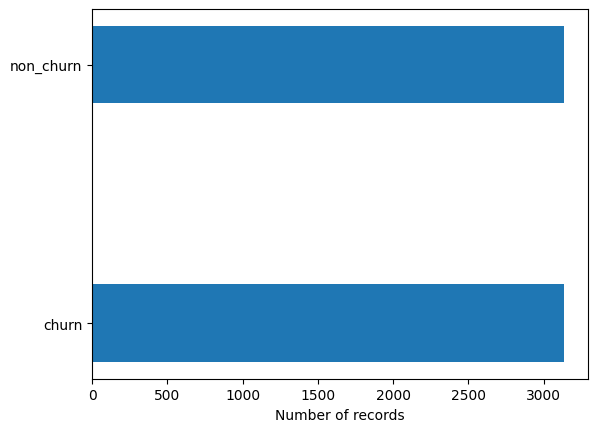

In [29]:
label_value, count = np.unique(y_smote, return_counts=True)
plt.barh(['churn', 'non_churn'], count, height=0.3)
plt.xlabel("Number of records")
plt.show()

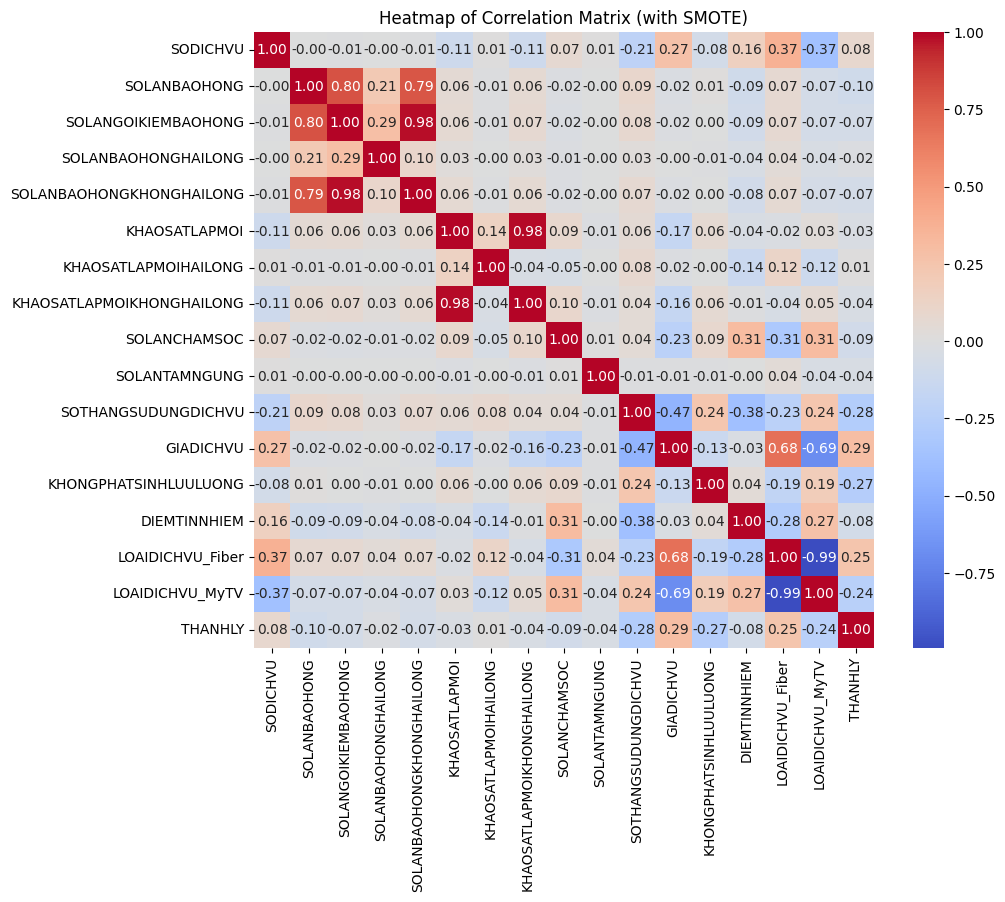

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

X_smote['THANHLY'] = y_smote
correlation_matrix = X_smote.corr()  # Hoặc tương quan giữa các cột trong X_smote

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix (with SMOTE)')
plt.show()

In [ ]:
temp1 = X_smote.iloc[:, :3]
# temp1 = X_smote
temp2 = y_smote

print(temp1.info())

X_train, X_test, y_train, y_test = train_test_split(temp1, temp2, test_size=0.3, random_state=42, shuffle=True)
# model = KNeighborsClassifier()
model = DecisionTreeClassifier(random_state=42)
model.fit(np.array(X_train), y_train)
y_pred = model.predict(np.array(X_test))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()
plt.show()

Xây dựng model và tính các chỉ số đánh giá

In [21]:
classifier_algorithms = {
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=42), 
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42), 
    "Logistic Regression": LogisticRegression(random_state=42),
}
avg_acc_scores = []
avg_f1_scores = []

accuracies = {model: [] for model in classifier_algorithms}
f1_scores = {model: [] for model in classifier_algorithms}
for clf_name in classifier_algorithms:
    model = classifier_algorithms[clf_name]
    scoring = ("accuracy", "f1")
    k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_validate(model, np.array(X_smote), y_smote, scoring=scoring, cv=k_fold, return_indices=True, return_estimator=True)
    acc_score = sum(scores['test_accuracy']) / len(scores['test_accuracy'])
    f1 = sum(scores['test_f1']) / len(scores['test_f1'])
    temp = scores["estimator"]
    print(temp[0].get_params())
    avg_f1_scores.append(round(f1, 3))
    avg_acc_scores.append(round(acc_score, 3))
    accuracies[clf_name].extend(scores['test_accuracy'])
    f1_scores[clf_name].extend(scores['test_f1'])
    print('test_accuracy', acc_score)
    print('test_f1', f1)
    print('run_time', sum(scores['fit_time']) + sum(scores['score_time']))
print(accuracies)
print(f1_scores)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
test_accuracy 0.9155794451386138
test_f1 0.9139235414024368
run_time 0.5670723915100098
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
test_accuracy 0.9686214305305825
test_f1 0.9687761873086785
run_time 0.5389721393585205
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
test_

In [17]:
{
    'algorithm': 'auto',
    'leaf_size': 30,
    'metric': 'minkowski',
    'metric_params': None,
    'n_jobs': None,
    'n_neighbors': 7,
    'p': 2,
    'weights': 'uniform'
}

{"algorithm": "auto", "leaf_size": 30, "metric": "minkowski", "metric_params": null, "n_jobs": null, "n_neighbors": 7, "p": 2, "weights": "uniform"}


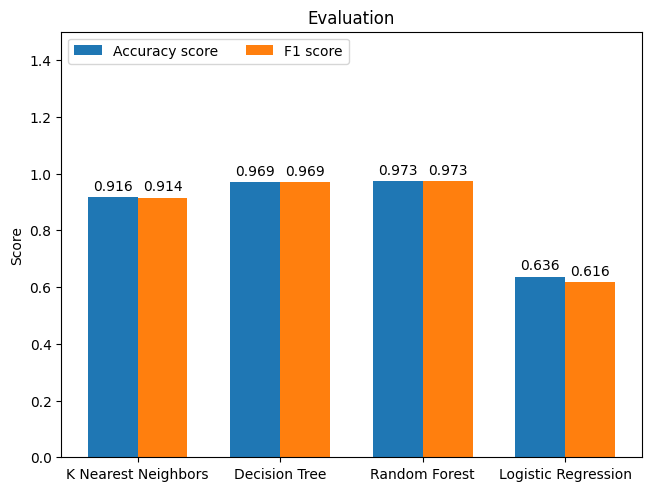

In [22]:
clf_names = list(classifier_algorithms.keys())
x = np.arange(len(clf_names))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
    
offset = width * 0
rects = ax.bar(x + offset, avg_acc_scores, width, label="Accuracy score")
ax.bar_label(rects, padding=3)

offset = width * 1
rects = ax.bar(x + offset, avg_f1_scores, width, label="F1 score")
ax.bar_label(rects, padding=3)

ax.set_ylabel('Score')
ax.set_title('Evaluation')
ax.set_xticks((x + width*0 + x + width*1)/2, clf_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

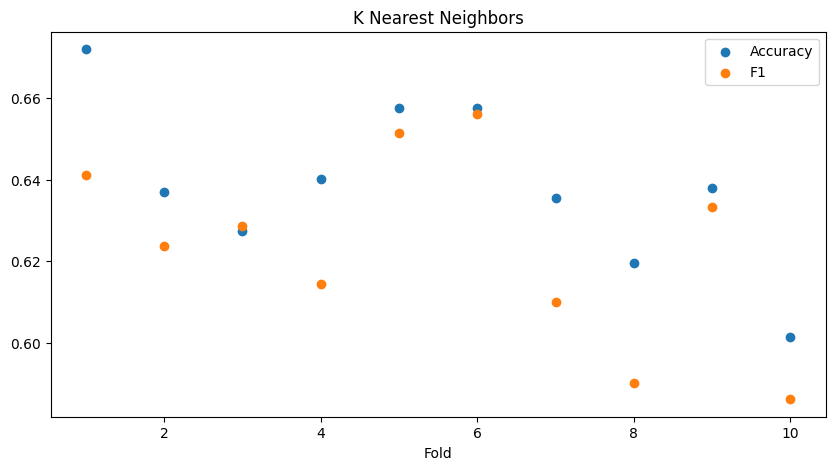

In [40]:
folds = [i for i in range(1, 11)]
plt.figure(figsize=(10, 5))
plt.title("K Nearest Neighbors")
plt.scatter(x=folds, y=scores['test_accuracy'], label='Accuracy')
plt.scatter(x=folds, y=scores['test_f1'], label='F1')
plt.xlabel("Fold")
plt.legend()
plt.show()

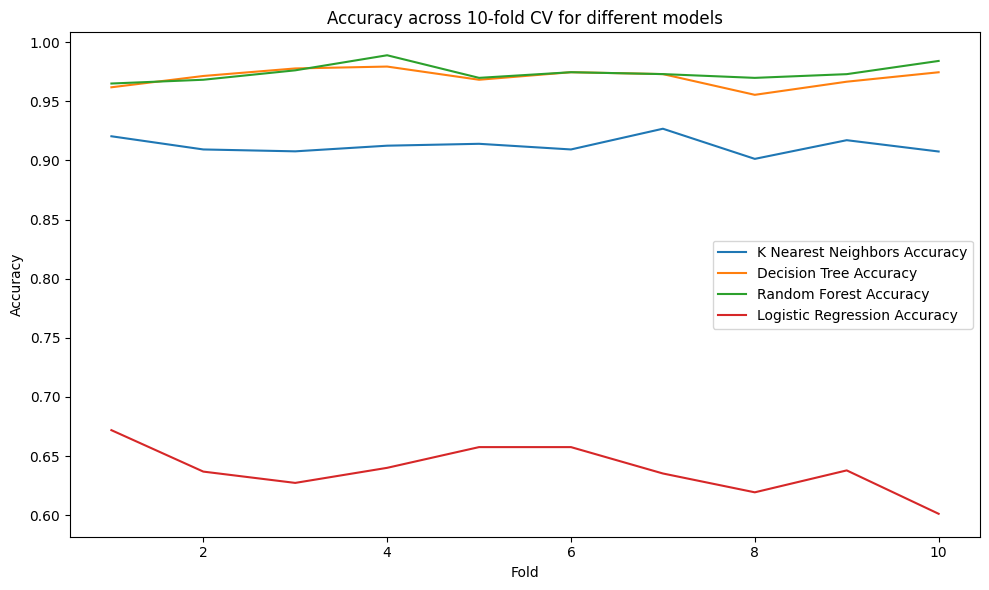

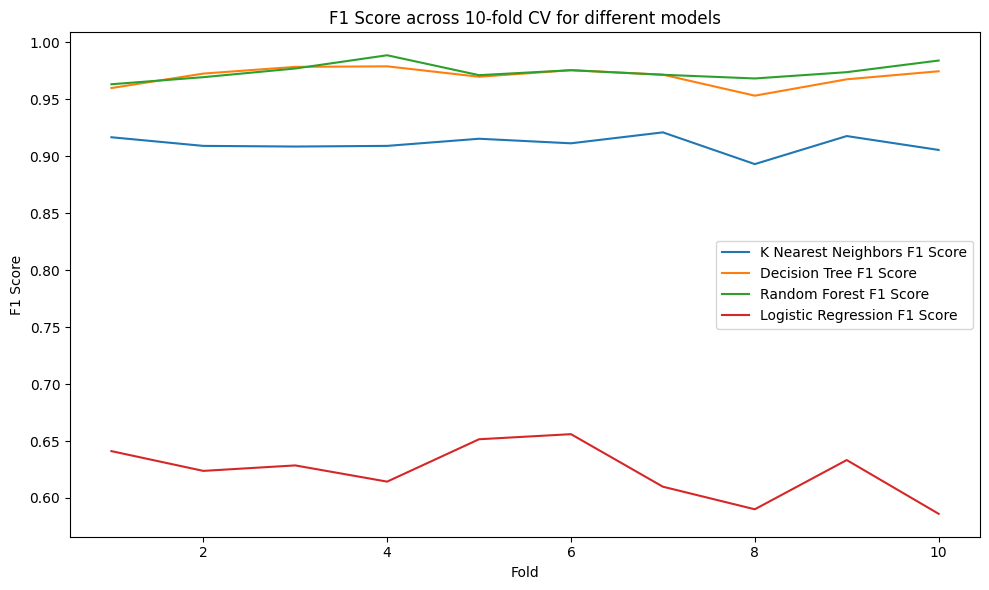

In [49]:
import seaborn as sns

plt.figure(figsize=(10, 6))
folds = [i for i in range(1, 11)]

for model_name in classifier_algorithms:
    sns.lineplot(x=folds, y=accuracies[model_name], label=f'{model_name} Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy across 10-fold CV for different models')
plt.legend()
plt.tight_layout()
plt.show()

# Biểu đồ line chart sử dụng Seaborn - F1 Score
plt.figure(figsize=(10, 6))
for model_name in classifier_algorithms:
    sns.lineplot(x=folds, y=f1_scores[model_name], label=f'{model_name} F1 Score')

plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('F1 Score across 10-fold CV for different models')
plt.legend()
plt.tight_layout()
plt.show()